https://www.datacamp.com/courses/statistical-thinking-in-python-part-1
# 1. Exploratory Data Analysis: process of organizing, plotting & summarizing a dataset

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
swing = pd.read_csv('datasets/2008_swing_states.csv')
swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [6]:
swing[['state', 'county', 'dem_share']].head(3)

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07


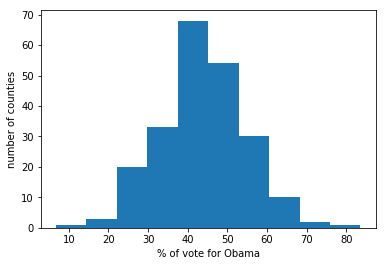

In [13]:
plt.hist(swing.dem_share)
plt.xlabel('% of vote for Obama')
plt.ylabel('number of counties')
plt.show()

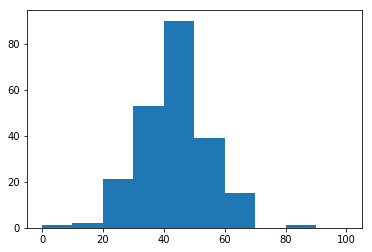

In [15]:
plt.hist(swing.dem_share, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()

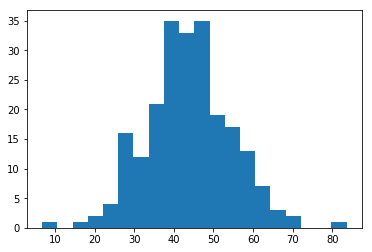

In [17]:
plt.hist(swing.dem_share, bins=20)
plt.show()

# 2. Seaborn: a Matplotlib-based statistical data visualization package

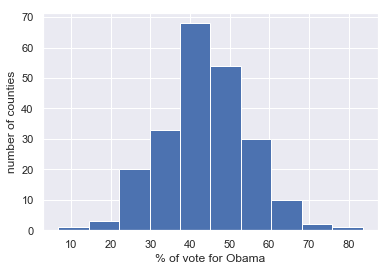

In [21]:
sns.set()
plt.hist(swing.dem_share)
plt.xlabel('% of vote for Obama')
plt.ylabel('number of counties')
plt.show()

In [22]:
iris = pd.read_csv('datasets/Iris.csv')
iris.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [26]:
versi_length = iris[iris['Species']=='Iris-versicolor']
type(versi_length)

pandas.core.frame.DataFrame

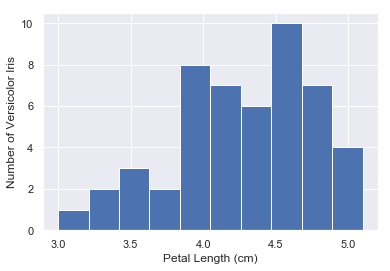

In [31]:
plt.hist(versi_length.PetalLength)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Number of Versicolor Iris')
plt.show()

## The "square root rule": a commonly-used rule of thumb for choosing number of bins. Choose the number of bins to be the square root of the number of samples. 
## Binning bias: the same data may be interpreted differently depending on choice of bins.

In [45]:
# Count number of rows
rows = len(versi_length)
rows

50

In [38]:
np.sqrt(rows)

7.0710678118654755

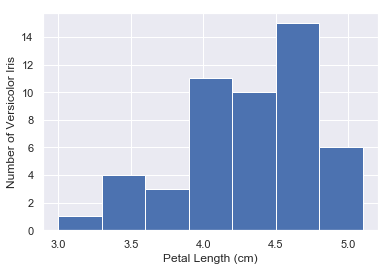

In [44]:
plt.hist(versi_length.PetalLength, int(np.sqrt(rows)))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Number of Versicolor Iris')
plt.show()

# 3. Bee swarm plots
## The graph below: an observation is a county; the features are state and the Democratic share of the vote.

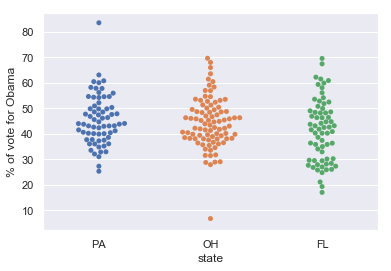

In [51]:
sns.swarmplot(x='state', y='dem_share', data=swing)
plt.ylabel('% of vote for Obama')
plt.show()

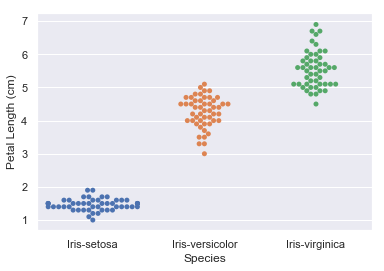

In [55]:
sns.swarmplot(x='Species', y='PetalLength', data=iris)
plt.ylabel('Petal Length (cm)')
plt.show()

# 4. ECDFs: Empirical cumulative distribution function

In [66]:
x = np.sort(swing.dem_share)
type(x)

numpy.ndarray

In [69]:
x

array([ 6.8 , 17.06, 19.33, 21.15, 24.81, 25.34, 25.81, 25.93, 26.09,
       26.84, 27.04, 27.32, 27.33, 27.67, 27.92, 27.93, 28.17, 28.43,
       28.79, 28.94, 29.07, 29.45, 29.53, 29.66, 30.15, 30.27, 31.04,
       31.47, 31.56, 31.75, 32.12, 32.88, 32.94, 32.97, 33.56, 33.57,
       34.01, 34.08, 34.58, 34.84, 35.03, 35.22, 35.47, 35.71, 35.86,
       35.86, 36.05, 36.06, 36.07, 36.11, 36.35, 36.39, 36.43, 36.54,
       36.71, 37.26, 37.43, 37.53, 37.62, 37.72, 37.77, 38.01, 38.07,
       38.1 , 38.11, 38.23, 38.25, 38.53, 38.62, 38.66, 38.96, 39.26,
       39.43, 39.67, 39.84, 39.86, 39.92, 40.09, 40.1 , 40.11, 40.18,
       40.24, 40.25, 40.26, 40.32, 40.45, 40.47, 40.64, 40.67, 40.89,
       41.21, 41.32, 41.55, 41.56, 41.61, 41.77, 41.85, 41.97, 42.2 ,
       42.23, 42.38, 42.49, 42.52, 42.65, 42.65, 42.97, 43.05, 43.11,
       43.12, 43.15, 43.18, 43.19, 43.43, 43.76, 43.78, 43.82, 43.92,
       44.03, 44.08, 44.14, 44.69, 44.71, 44.74, 44.78, 44.9 , 45.26,
       45.31, 45.45,

In [61]:
b = len(x)
b

222

In [64]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Making an ECDF

In [65]:
y = np.arange(1, b+1)/b

In [70]:
np.arange(1, 223)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [72]:
np.arange(1, 223)/222

array([0.0045045 , 0.00900901, 0.01351351, 0.01801802, 0.02252252,
       0.02702703, 0.03153153, 0.03603604, 0.04054054, 0.04504505,
       0.04954955, 0.05405405, 0.05855856, 0.06306306, 0.06756757,
       0.07207207, 0.07657658, 0.08108108, 0.08558559, 0.09009009,
       0.09459459, 0.0990991 , 0.1036036 , 0.10810811, 0.11261261,
       0.11711712, 0.12162162, 0.12612613, 0.13063063, 0.13513514,
       0.13963964, 0.14414414, 0.14864865, 0.15315315, 0.15765766,
       0.16216216, 0.16666667, 0.17117117, 0.17567568, 0.18018018,
       0.18468468, 0.18918919, 0.19369369, 0.1981982 , 0.2027027 ,
       0.20720721, 0.21171171, 0.21621622, 0.22072072, 0.22522523,
       0.22972973, 0.23423423, 0.23873874, 0.24324324, 0.24774775,
       0.25225225, 0.25675676, 0.26126126, 0.26576577, 0.27027027,
       0.27477477, 0.27927928, 0.28378378, 0.28828829, 0.29279279,
       0.2972973 , 0.3018018 , 0.30630631, 0.31081081, 0.31531532,
       0.31981982, 0.32432432, 0.32882883, 0.33333333, 0.33783

### x must be sorted. y must be np.arange(1, len+1)/len

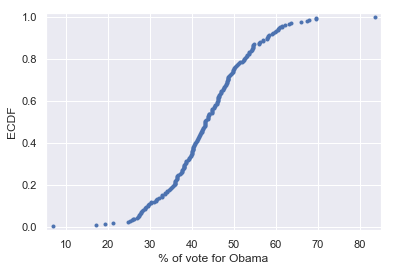

In [82]:
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('% of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges. Choosing a value of 0.02 gives a 2% buffer all round the plot.
plt.show()

# Practice 4
## 1) Plotting the ECDF

In [83]:
def f(m):
    n = len(m)
    x=np.sort(m)
    y=np.arange(1, n+1)/n
    return x, y

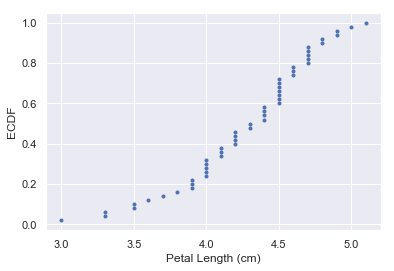

In [92]:
x_vers, y_vers = f(versi_length.PetalLength)
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.xlabel('Petal Length (cm)')
plt.ylabel('ECDF')
plt.show()

In [93]:
np.sort(versi_length.PetalLength)

array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
       4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

## 2) Comparison of ECDFs

In [98]:
setosa_length = iris[iris['Species']=='Iris-setosa']
setosa_length.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [101]:
vir_length = iris[iris.Species=='Iris-virginica']
vir_length.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


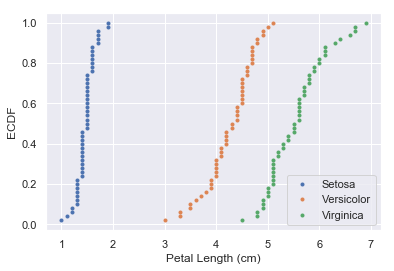

In [115]:
x_seto, y_seto = f(setosa_length.PetalLength)
x_vers, y_vers = f(versi_length.PetalLength)
x_vir, y_vir = f(vir_length.PetalLength)

plt.plot(x_seto, y_seto, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_vir, y_vir, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Setosa', 'Versicolor', 'Virginica'), loc='lower right')
plt.xlabel('Petal Length (cm)')
plt.ylabel('ECDF')
plt.show()